In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sbrn
import numpy as np
import re
import datetime

%matplotlib inline

In [3]:
dat = pd.read_csv('./../../data/water_pump/training.csv', header=0)
labels = pd.read_csv('./../../data/water_pump/training_labels.csv', header=0)
#join labels to dat on "id" (left outer)

dat=dat.merge(labels, how='left', left_on='id', right_on='id',copy=False)

In [33]:
dat.columns

Index([u'id', u'amount_tsh', u'date_recorded', u'funder', u'gps_height',
       u'installer', u'longitude', u'latitude', u'wpt_name', u'num_private',
       u'basin', u'subvillage', u'region', u'region_code', u'district_code',
       u'lga', u'ward', u'population', u'public_meeting', u'recorded_by',
       u'scheme_management', u'scheme_name', u'permit', u'construction_year',
       u'extraction_type', u'extraction_type_group', u'extraction_type_class',
       u'management', u'management_group', u'payment', u'payment_type',
       u'water_quality', u'quality_group', u'quantity', u'quantity_group',
       u'source', u'source_type', u'source_class', u'waterpoint_type',
       u'waterpoint_type_group', u'status_group'],
      dtype='object')

In [7]:
dat.population.replace(to_replace={0:np.nan}, inplace=True)

In [27]:
dat.population.isnull().sum()

21381

In [35]:
#let's look at population by imputing with mean population in neighboring areas, in this order:
#sub-village > ward > lga > region_code

dat.population.fillna(dat.groupby(['subvillage'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['ward'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['lga'])['population'].transform('mean'), inplace=True)
dat.population.fillna(dat.groupby(['region_code'])['population'].transform('mean'), inplace=True)




status_group
functional                 Axes(0.125,0.125;0.775x0.775)
functional needs repair    Axes(0.125,0.125;0.775x0.775)
non functional             Axes(0.125,0.125;0.775x0.775)
Name: population, dtype: object

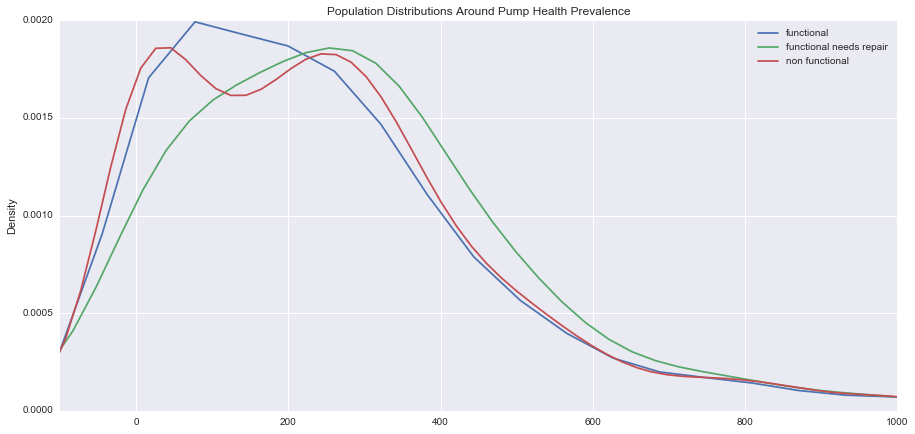

In [52]:
dat.groupby(dat.status_group)['population'].plot.kde(legend=True, title='Population Distributions Around Pumps \n by Their Operational Status', xlim=(-100,1000), figsize=(15,7)) #pop around the well

In [67]:
## LOCATION
# gps_height

(dat.gps_height == 0).sum()/float(len(dat.gps_height))

0.34407407407407409

In [68]:
dat.gps_height.replace(to_replace={0:np.nan}, inplace=True)

In [76]:
#let's look at gps_height by imputing with mean gps_height in neighboring areas, in this order:
#sub-village > ward > lga > region_code

dat.gps_height.fillna(dat.groupby(['subvillage'])['gps_height'].transform('mean'), inplace=True)
dat.gps_height.fillna(dat.groupby(['ward'])['gps_height'].transform('mean'), inplace=True)
dat.gps_height.fillna(dat.groupby(['lga'])['gps_height'].transform('mean'), inplace=True)
dat.gps_height.fillna(dat.groupby(['region_code'])['gps_height'].transform('mean'), inplace=True)

In [77]:
dat.gps_height.isnull().sum()

0

status_group
functional                 Axes(0.125,0.125;0.775x0.775)
functional needs repair    Axes(0.125,0.125;0.775x0.775)
non functional             Axes(0.125,0.125;0.775x0.775)
Name: gps_height, dtype: object

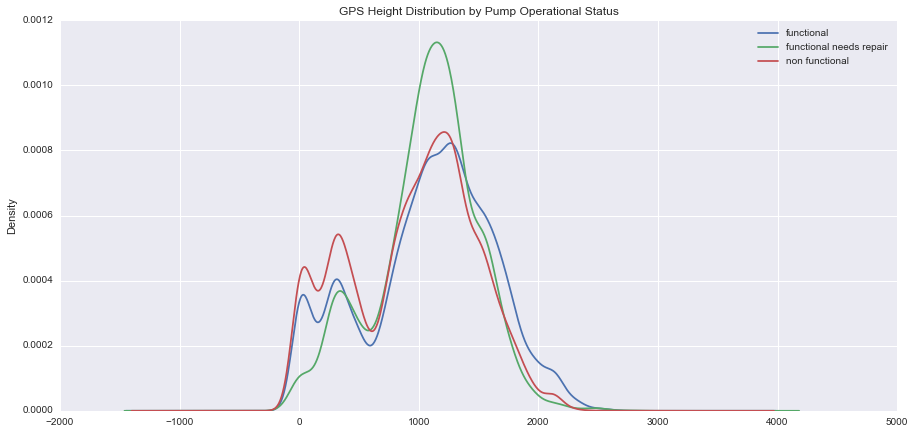

In [78]:
dat.groupby(dat.status_group)['gps_height'].plot.kde(legend=True, title='GPS Height Distribution by Pump Operational Status', figsize=(15,7)) 

In [ ]:
dat_backup=dat.copy()

In [98]:
dat=dat_backup

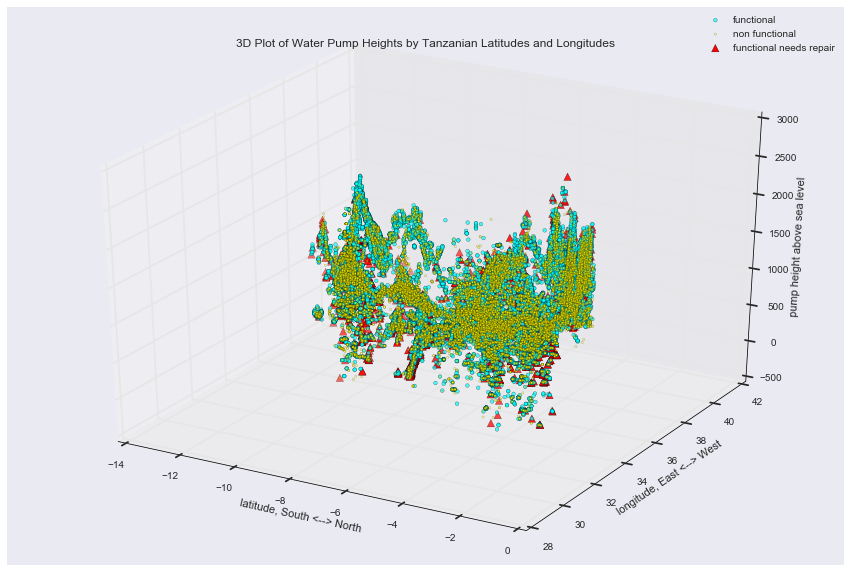

In [123]:
# now that gps_height is imputed, try replotting in 3D to better see height. Try to remove longitudinal outlier at 12
#let's go 3D with lat, long, and gps-height; by pump health

dat = dat[dat.longitude>10]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=dat.loc[dat.status_group.isin(['functional']),'latitude'],
           ys=dat.loc[dat.status_group.isin(['functional']),'longitude'],
           zs=dat.loc[dat.status_group.isin(['functional']),'gps_height'],
           c='cyan',
           alpha=0.7,
           marker='.',
           s=55,
          label='functional')
ax.scatter(xs=dat.loc[dat.status_group.isin(['non functional']),'latitude'],
           ys=dat.loc[dat.status_group.isin(['non functional']),'longitude'],
           zs=dat.loc[dat.status_group.isin(['non functional']),'gps_height'],
           c='yellow',
           marker='.',
           alpha=.4,
          s=21,
          label='non functional')
ax.scatter(xs=dat.loc[dat.status_group.isin(['functional needs repair']),'latitude'],
           ys=dat.loc[dat.status_group.isin(['functional needs repair']),'longitude'],
           zs=dat.loc[dat.status_group.isin(['functional needs repair']),'gps_height'],
           c='red',
           marker='^',
          s=55,
          label='functional needs repair', depthshade=True)
ax.set_xlabel('latitude, South <--> North')
ax.set_ylabel('longitude, East <--> West')
ax.set_zlabel('pump height above sea level')
#ax.xy_dataLim([-14,30],[0,50])
#ax.ylim(10,50)
#ax.zlim(-500,2500)
ax.legend()
ax.set_title('3D Plot of Water Pump Heights by Tanzanian Latitudes and Longitudes')